# Natural Language Processing

In [1]:
import nltk

In [3]:
# nltk.download_shell()

In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [13]:
# messages

In [5]:
len(messages)

5574

In [11]:
print(messages[23])

ham	Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?


In [15]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message,'\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [17]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [18]:
import pandas as pd

In [19]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [20]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [24]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Feature engineering

In [25]:
messages['lenght'] = messages['message'].apply(len)

In [26]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

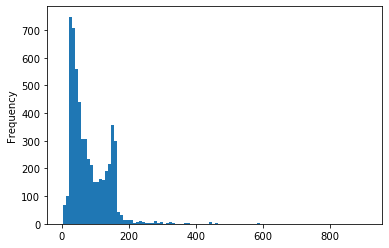

In [36]:
messages['lenght'].plot.hist(bins=100)

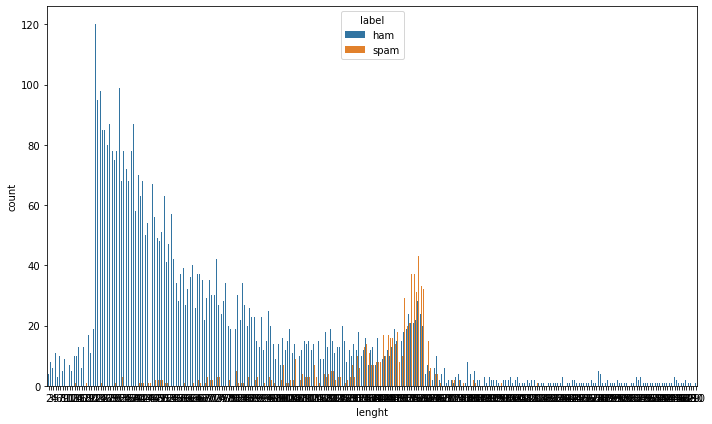

In [39]:
plt.figure(figsize=(10,6))
sns.countplot('lenght', hue='label', data=messages)
plt.tight_layout()

In [35]:
messages['lenght'].describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

In [55]:
messages[messages['lenght'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C05465B788>,
      dtype=object)

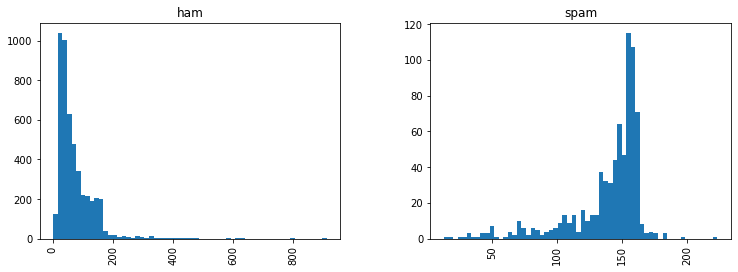

In [56]:
messages.hist('lenght','label',bins=60, figsize=(12,4))

## Convert messages to vectors

### Removing punctuation

In [57]:
import string

In [58]:
mess = 'Sample messages! notice: it has punctuation.'

In [59]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
nopunc = [c for c in mess if c not in string.punctuation]

In [64]:
#nopunc

## Remove english stop words

In [66]:
from nltk.corpus import stopwords

In [71]:
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [72]:
nopunc = ''.join(nopunc)

In [73]:
nopunc

'Sample messages notice it has punctuation'

In [74]:
nopunc.split()

['Sample', 'messages', 'notice', 'it', 'has', 'punctuation']

In [76]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [77]:
clean_mess

['Sample', 'messages', 'notice', 'punctuation']

# Developing function

In [82]:
def text_process(mess):
    """
    This functions sets a test to its evaluation for HAM/SPAM
    1 - remove punctiation
    2 - remove stopwords
    3 - return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [83]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Tokenization

messages converted on list of tokens

In [84]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### count Vectorization

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

## Bag of words transformer

In [87]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [88]:
print(len(bow_transformer.vocabulary_))

11425


In [89]:
mess4 = messages['message'][3]

In [90]:
mess4

'U dun say so early hor... U c already then say...'

In [91]:
bow4 = bow_transformer.transform([mess4])

In [93]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [94]:
print(bow4.shape)

(1, 11425)


In [96]:
bow_transformer.get_feature_names()[4068]

'U'

U appears twice in this message

# Sparse Matrix
for the whole corpus

In [98]:
messages_bow = bow_transformer.transform(messages['message'])

In [99]:
messages_bow.nnz # non zeros

50548

In [100]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [103]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


# TF-IDF

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer

In [108]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

For a single message:

In [109]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


Check for a particular word, say: university

In [110]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

### Convert the entire corpus

In [111]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## We're ready to build a model
Four varous reasons we will use:
### Naive Bayes classifier algorithm

In [112]:
from sklearn.naive_bayes import MultinomialNB

In [115]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Done, now we chek for a classification of a existing message:

In [118]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [119]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [120]:
messages['label'][3]

'ham'

Correcto!

In [122]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [124]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Train_Test_split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

Two options:
 * Repeat the whole process above, or
 * usign sklearn features, data pipeline:

In [128]:
from sklearn.pipeline import Pipeline

In [129]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [130]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001C05A52B828>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [131]:
preds = pipeline.predict(msg_test)

In [132]:
from sklearn.metrics import classification_report

In [134]:
print(classification_report(label_test, preds))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1432
        spam       1.00      0.63      0.78       240

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.87      1672
weighted avg       0.95      0.95      0.94      1672

